In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-4jfepe89 because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Single samples samples

In [2]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='data/plot_A_2Tau_genInfo_traing'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = False

In [3]:
# ! ls ../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples

In [66]:
# file = uproot.open("data/GenInfo_only_90.root")
# file_genMET = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M3p7_combined.root")
file_genMET = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M14_combined.root")

RHTree = file_genMET["fevt/RHTree"]


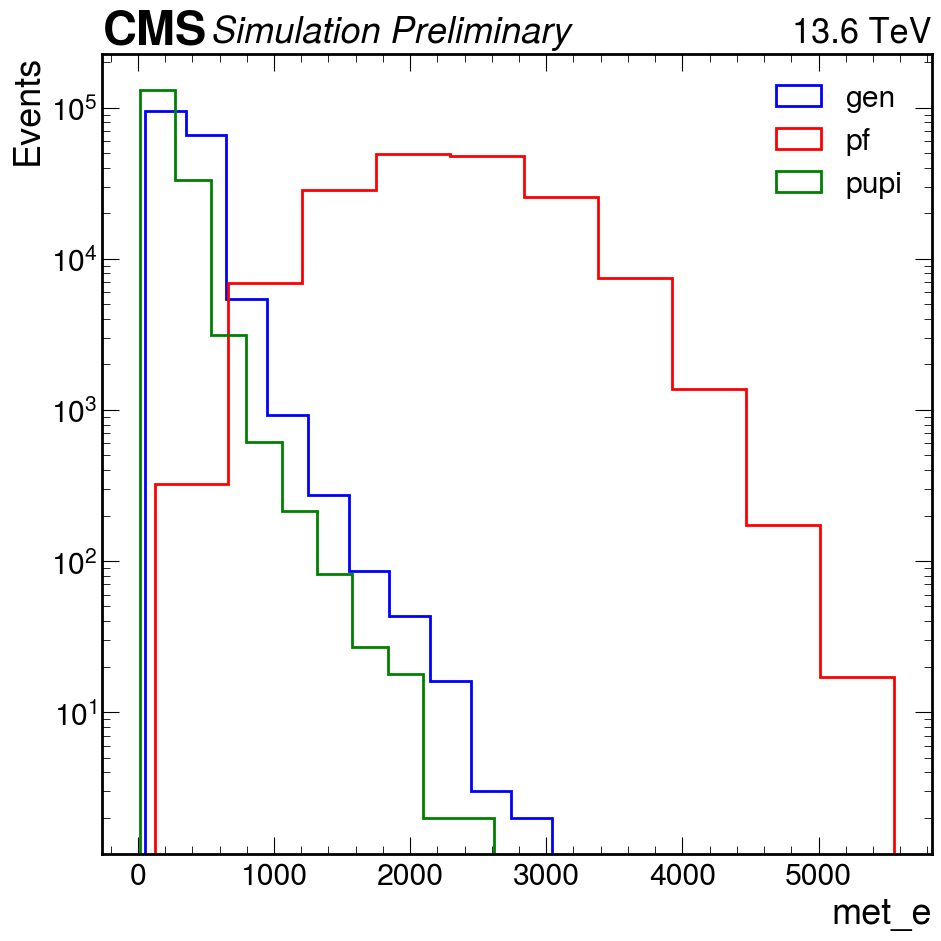

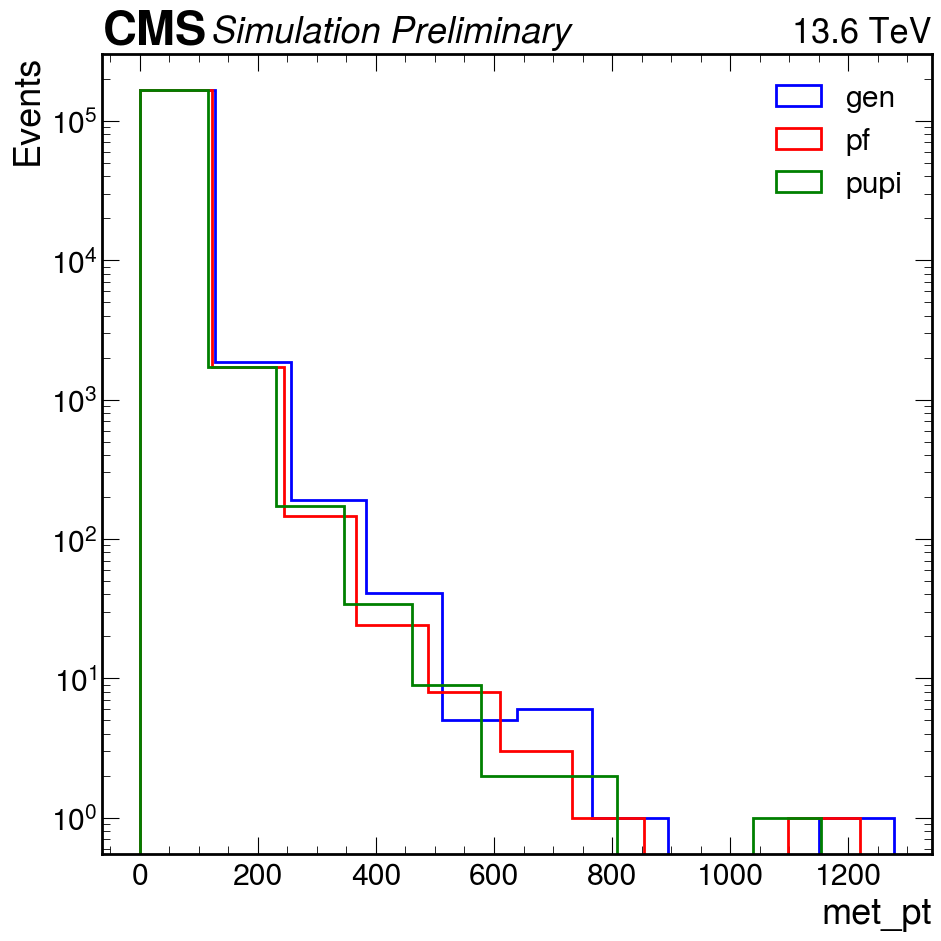

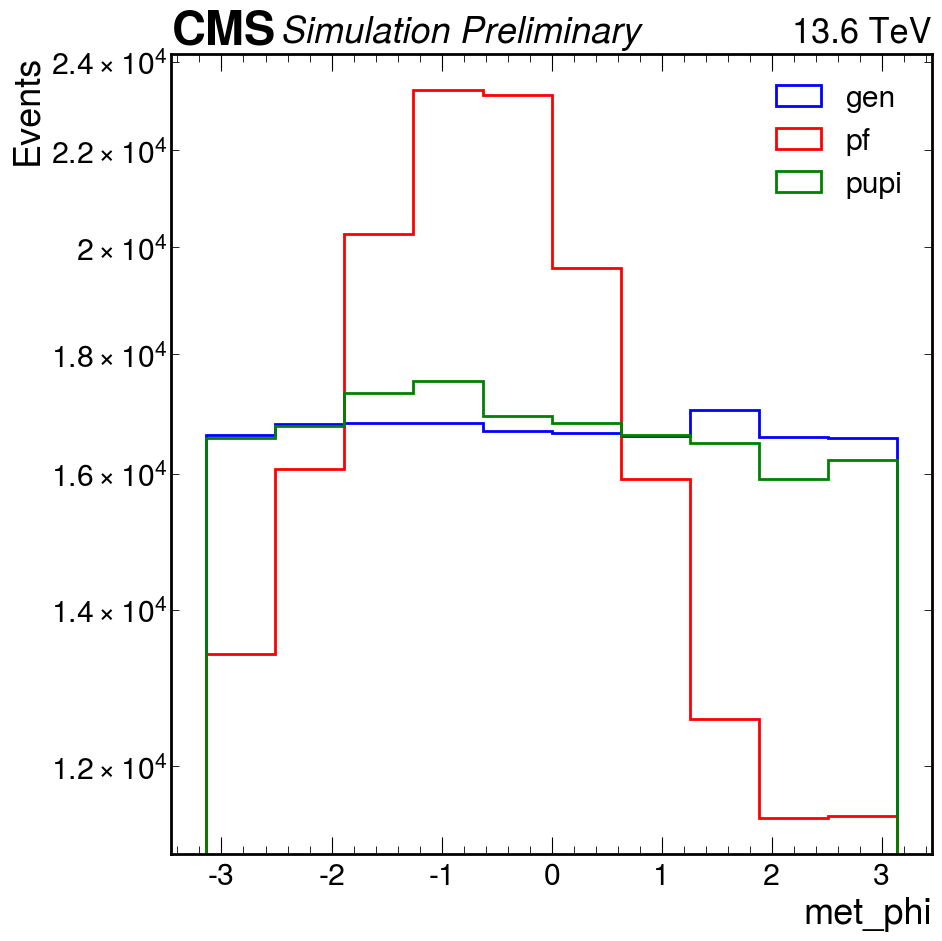

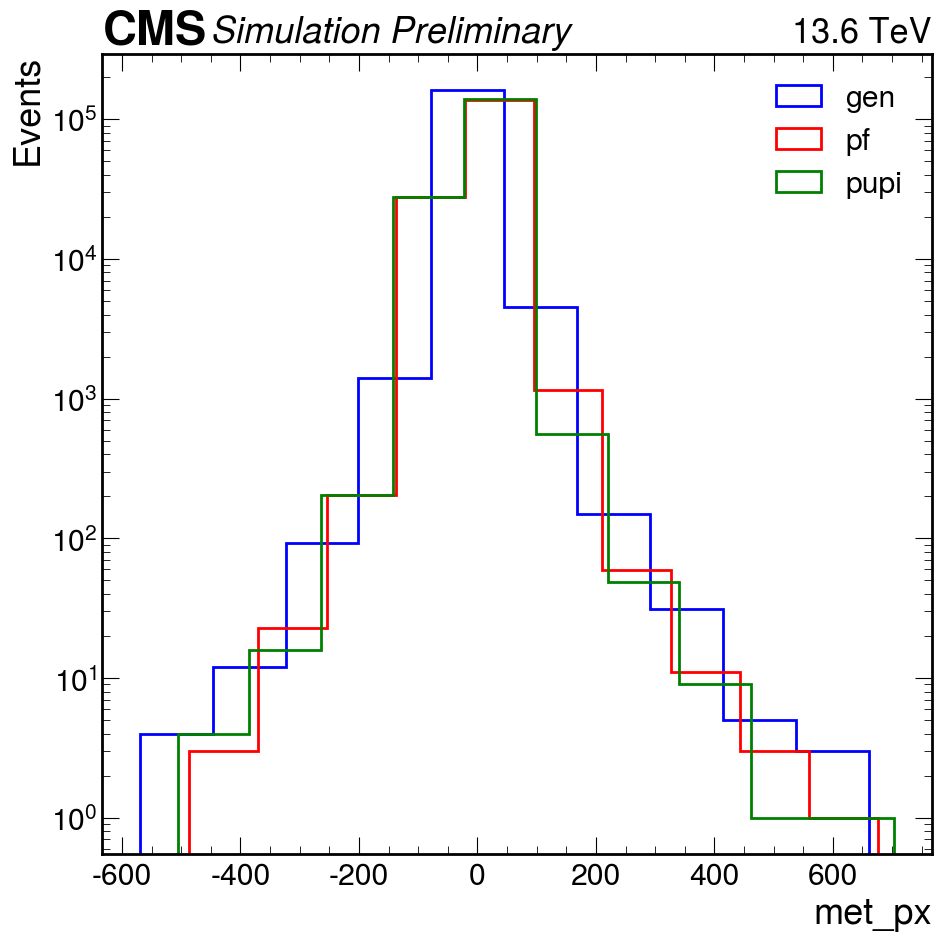

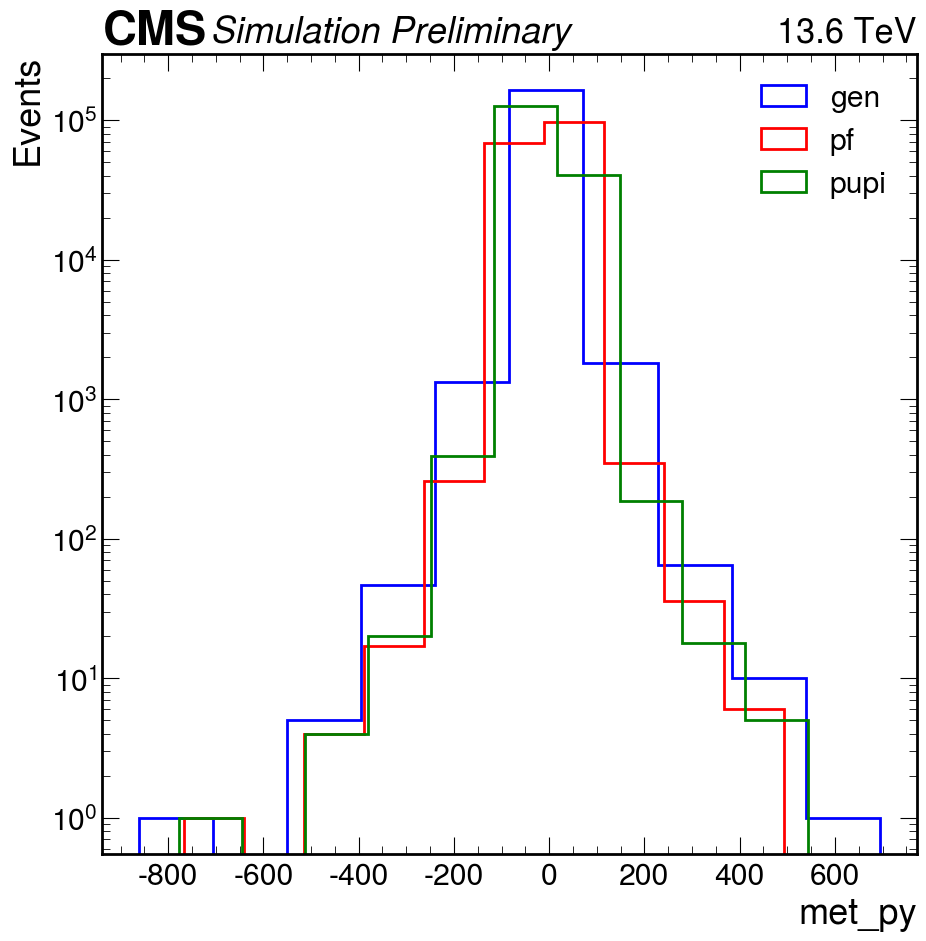

In [61]:

genmet = [ "genmet_e_reco","genmet_pt_reco","genmet_phi_reco","genmet_px_reco","genmet_py_reco"]  # Add more if needed
pupimet = [ "pupimet_e_reco","pupimet_pt_reco","pupimet_phi_reco","pupimet_px_reco","pupimet_py_reco"]  # Add more if needed
pfmet = ["met_e_reco","met_pt_reco","met_phi_reco","met_px_reco","met_py_reco"]  # Add more if needed
label = ["met_e","met_pt","met_phi","met_px","met_py"]  # Add more if needed
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'black']

for i in range(len(genmet)):
    fig, ax = plt.subplots()  # One figure per trigger
    
    
    # Extract data for trigger
    data_gen = RHTree.arrays(genmet[i], f"{genmet[i]} > -1111", library="numpy")[genmet[i]]
    plt.hist(data_gen, histtype='step', linewidth=2, color='b', label="gen")
    
    data_pf = RHTree.arrays(pfmet[i], f"{pfmet[i]} > -1111", library="numpy")[pfmet[i]]
    plt.hist(data_pf, histtype='step', linewidth=2, color='r', label="pf")
    
    data_pupi = RHTree.arrays(pupimet[i], f"{pupimet[i]} > -1111", library="numpy")[pupimet[i]]
    plt.hist(data_pupi, histtype='step', linewidth=2, color='g', label="pupi")

    
    ax.set_yscale("log")
    ax.set_xlabel(f"{label[i]}")
    ax.set_ylabel("Events")
    ax.legend()
    # ax.set_xticks(np.arange(0, 6, 1)) 
    
    # CMS Label
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)

    plt.tight_layout()
    plt.show()


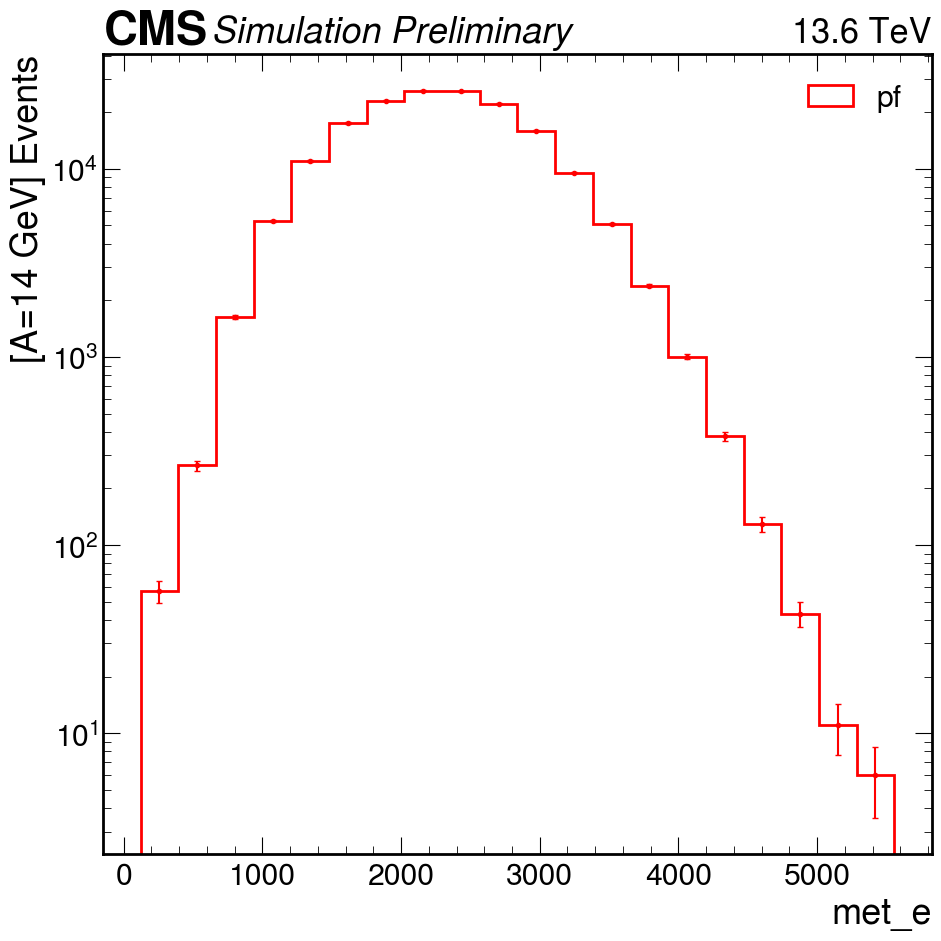

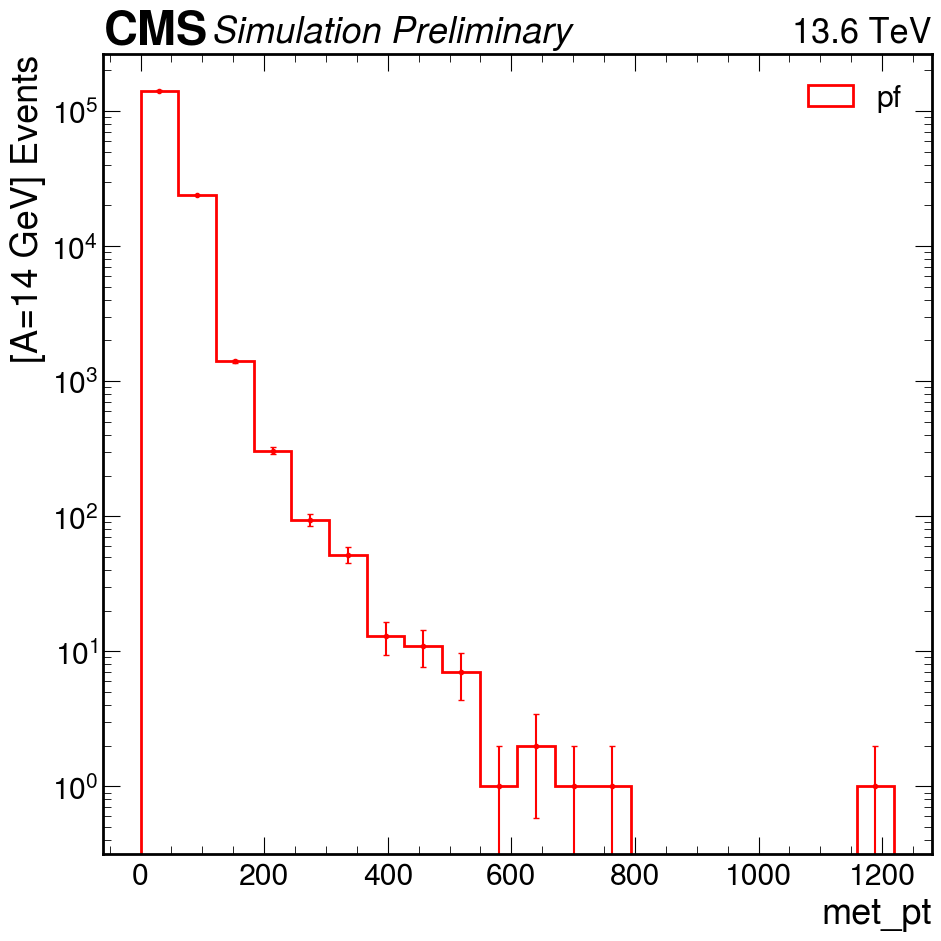

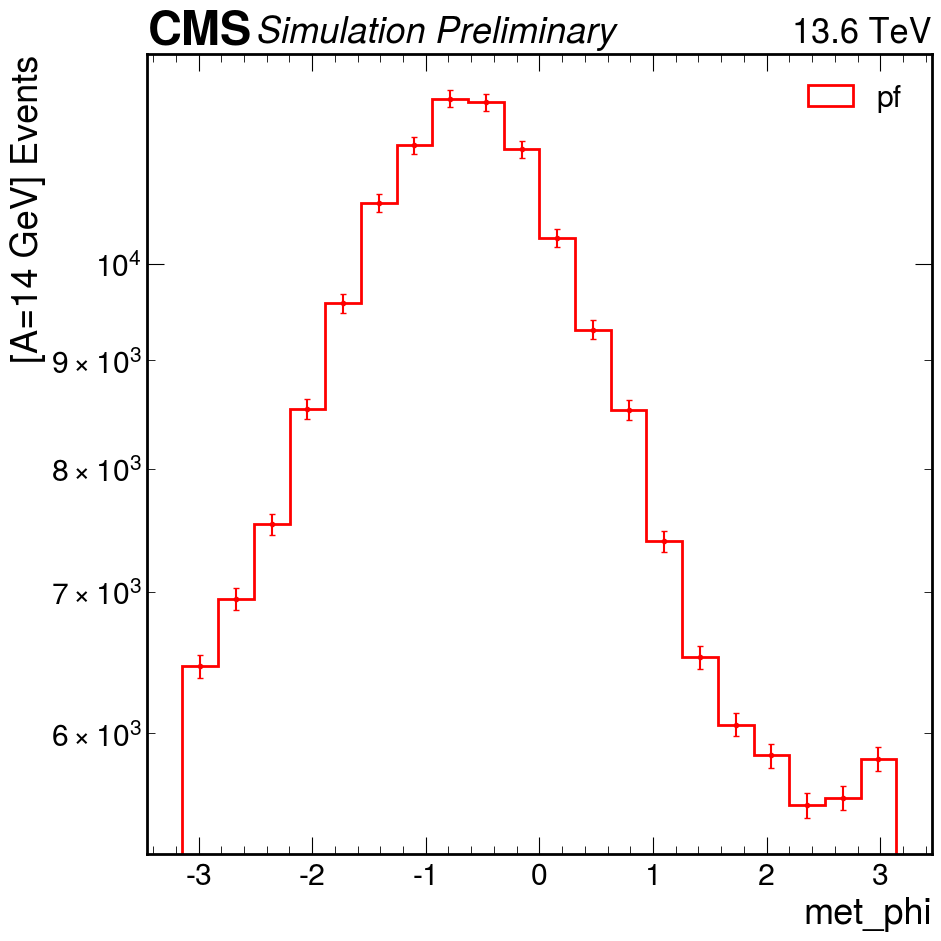

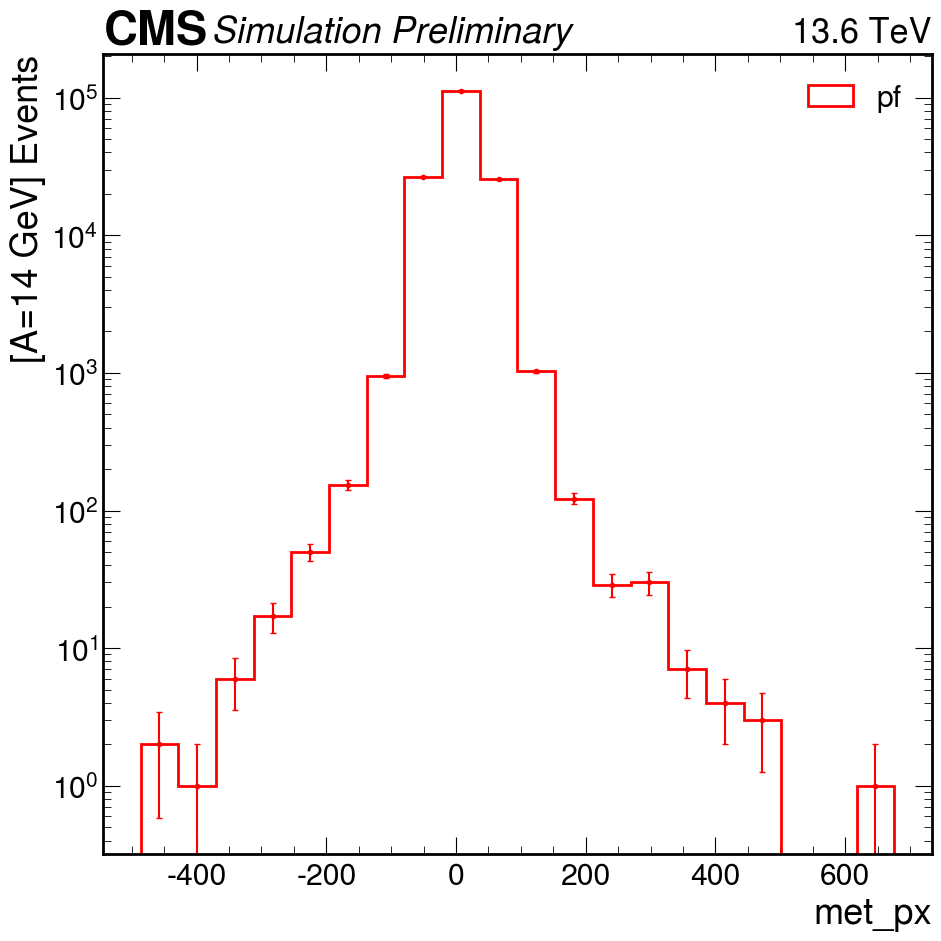

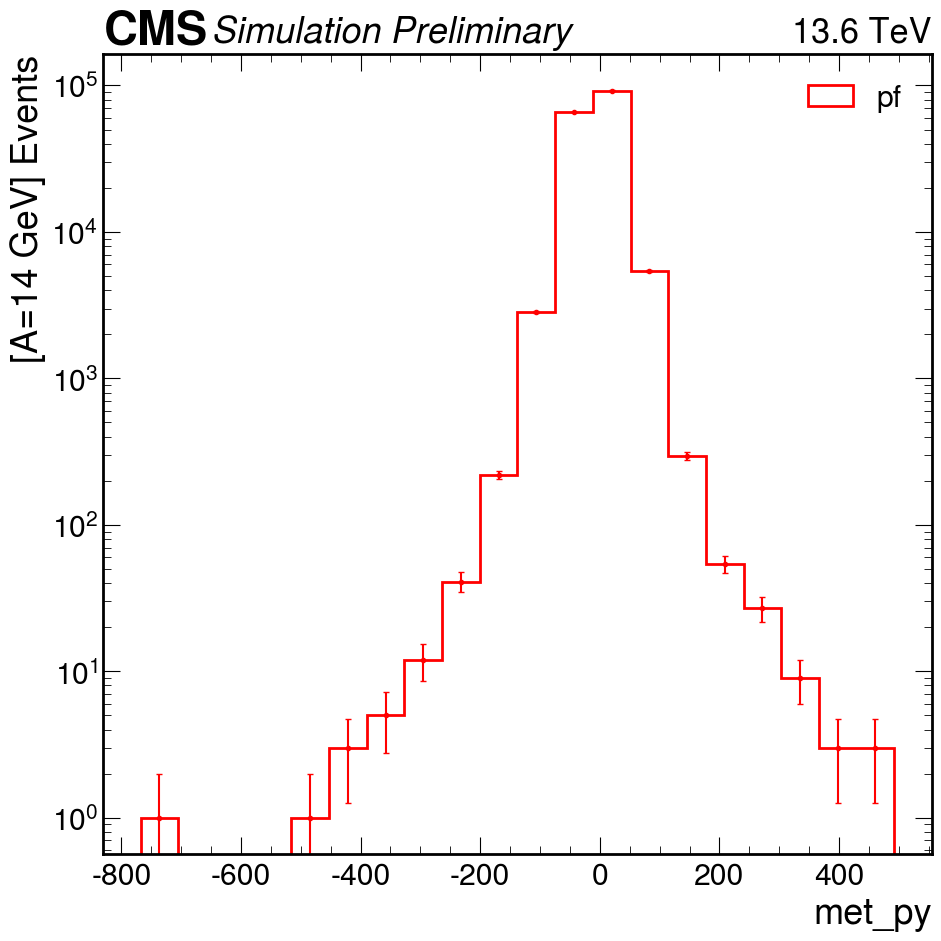

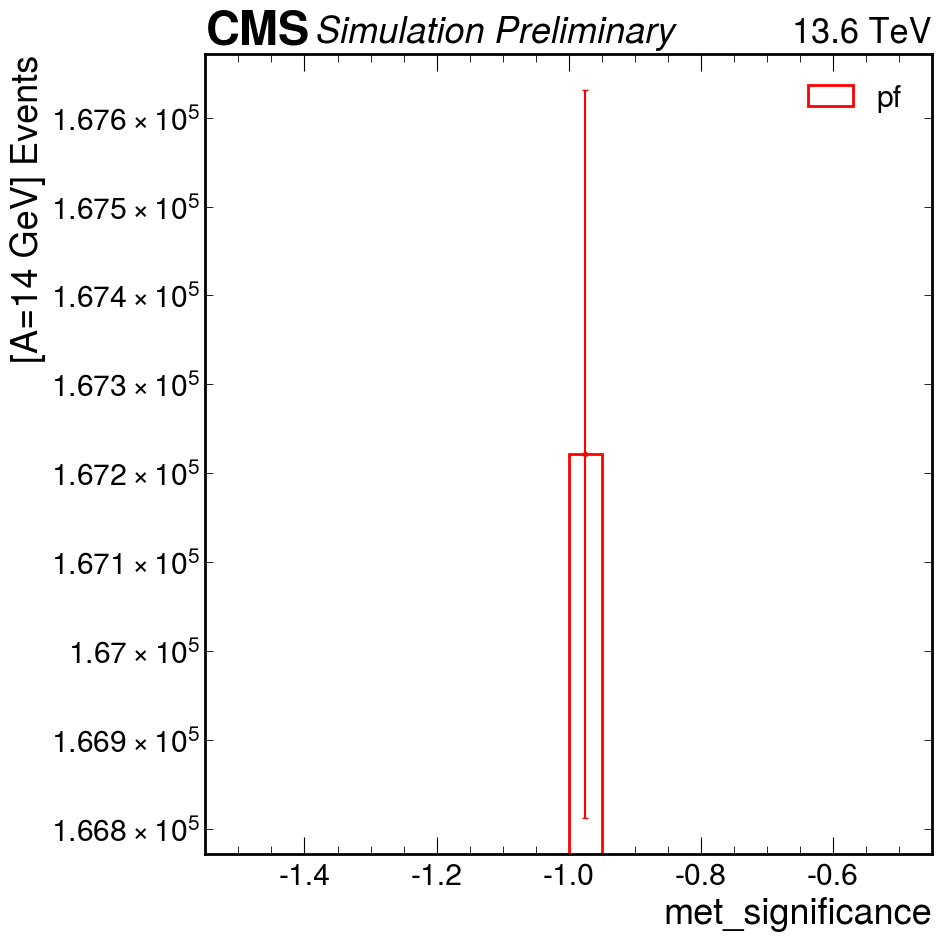

In [72]:

# Variable names
genmet = ["genmet_e_reco","genmet_pt_reco","genmet_phi_reco","genmet_px_reco","genmet_py_reco","genmet_significance_reco"]
pupimet = ["pupimet_e_reco","pupimet_pt_reco","pupimet_phi_reco","pupimet_px_reco","pupimet_py_reco", "met_significance_reco"]
pfmet = ["met_e_reco","met_pt_reco","met_phi_reco","met_px_reco","met_py_reco", "pupimet_significance_reco"]
label = ["met_e","met_pt","met_phi","met_px","met_py","met_significance"]

for i in range(len(genmet)):
    fig, ax = plt.subplots()

    # Function to plot histogram with error bars
    def hist_with_errors(data, bins, color, label):
        counts, bin_edges = np.histogram(data, bins=bins)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        errors = np.sqrt(counts)

        # Draw the step histogram
        ax.hist(data, bins=bin_edges, histtype='step', color=color, linewidth=2, label=label)

        # Overlay error bars
        ax.errorbar(bin_centers, counts, yerr=errors, fmt='.', color=color, capsize=2)

    bins = 20  # Change based on your preference

    data_gen = RHTree.arrays(genmet[i], f"{genmet[i]} > -1111", library="np")[genmet[i]]
    hist_with_errors(data_gen, bins, 'blue', 'gen')

    data_pf = RHTree.arrays(pfmet[i], f"{pfmet[i]} > -1111", library="np")[pfmet[i]]
    hist_with_errors(data_pf, bins, 'red', 'pf')

    data_pupi = RHTree.arrays(pupimet[i], f"{pupimet[i]} > -1111", library="np")[pupimet[i]]
    hist_with_errors(data_pupi, bins, 'green', 'pupi')
    
    ax.set_yscale("log")
    ax.set_xlabel(f"{label[i]}")
    ax.set_ylabel("[A=14 GeV] Events")
    ax.legend()
    # ax.set_yscale("log")  # optional
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
    plt.tight_layout()
    plt.show()

